In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


In [10]:
print("Customers Data Overview:")
print(customers.info())
print(customers.head())

Customers Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15


In [11]:
print("\nProducts Data Overview:")
print(products.info())
print(products.head())


Products Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [12]:
print("\nTransactions Data Overview:")
print(transactions.info())
print(transactions.head())


Transactions Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070   

In [13]:
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())


Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [4]:
# 1. Top Performing Regions
top_regions = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top Regions:", top_regions)

Top Regions: Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


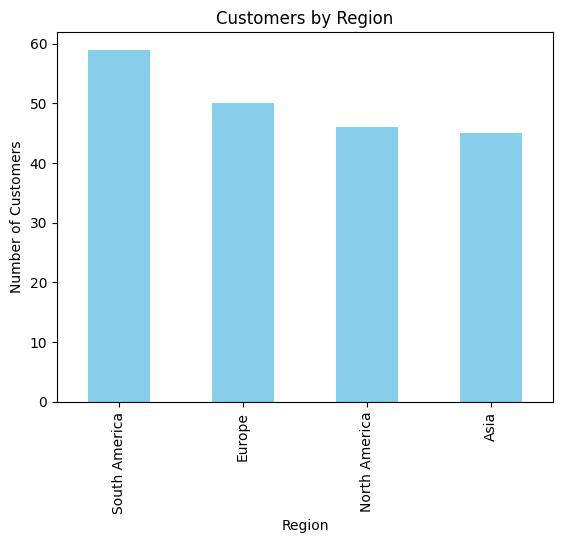

In [14]:
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', color='skyblue', title='Customers by Region')
plt.ylabel('Number of Customers')
plt.show()

In [5]:

# 2. Most Purchased Products
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
print("Top Products:", top_products)

Top Products: ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


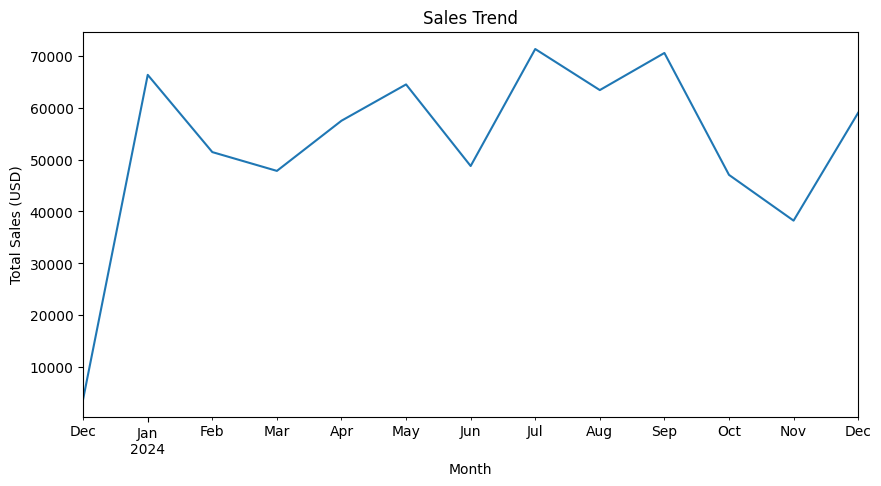

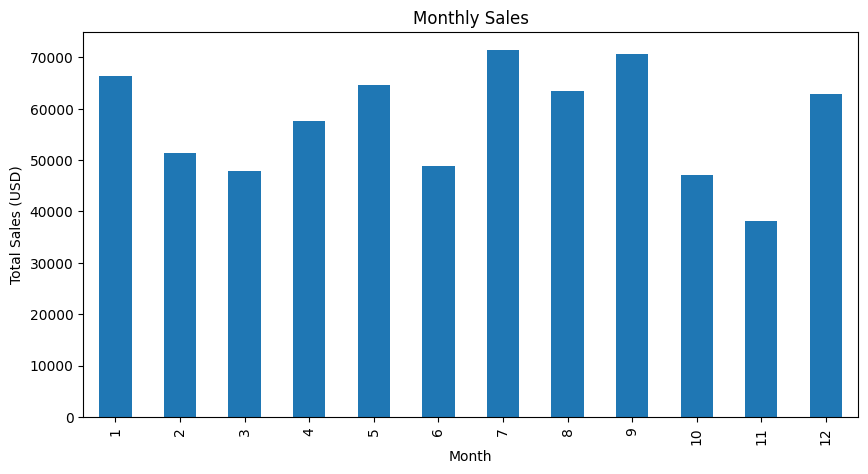

In [7]:
# 4. Seasonal Patterns in Sales
data['Month'] = data['TransactionDate'].dt.month
monthly_sales = data.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='bar', title="Monthly Sales", figsize=(10, 5))
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.show()

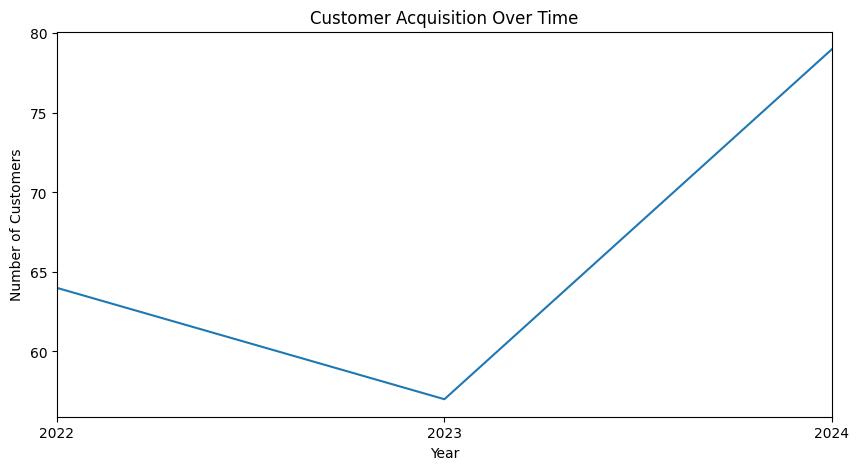

In [9]:
 #5. Customer Acquisition Trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customer_acquisition = customers.groupby(customers['SignupDate'].dt.to_period('Y')).size()
customer_acquisition.plot(kind='line', title="Customer Acquisition Over Time", figsize=(10, 5))
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.show()

In [ ]:
#